In [35]:
##Initial modules import
import numpy as np 
import sep 

In [36]:
##Additional modules to read test image and display plot
import astropy.io.fits
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

#show plot graphics
%matplotlib inline 

rcParams['figure.figsize'] = [10., 8.]

In [37]:

from astropy.utils.data import get_pkg_data_filename

#read image into standard 2-d numpy array
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
fits.info(image_file)
image_data = fits.getdata(image_file, ext=0)

Filename: /Users/sofia/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


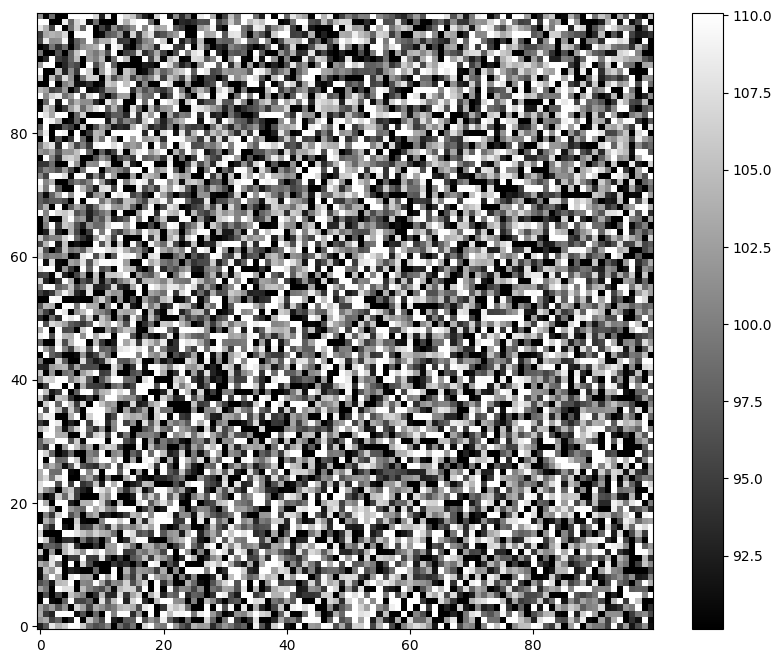

In [38]:
# show the image
m, s = np.mean(data), np.std(data)

plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

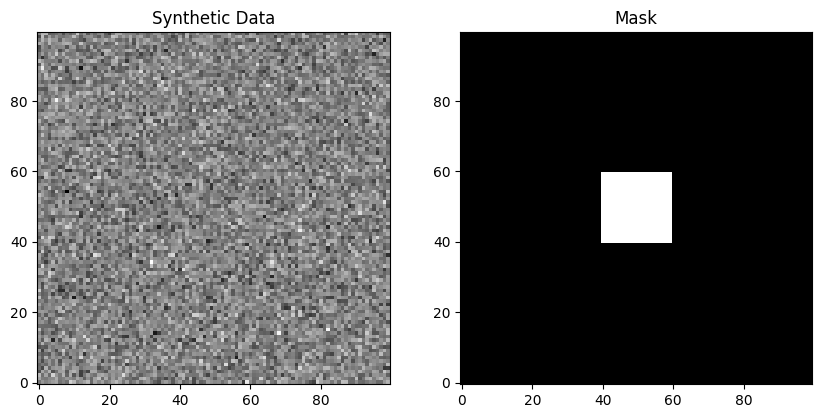

Global Background: 99.92633056640625
Global RMS: 9.795088768005371


In [39]:
# measure a spatially varying background on the image

import numpy as np
import sep
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your actual data)
data_size = (100, 100)
data = np.random.normal(loc=100, scale=10, size=data_size)

# Create a mask (replace this with your actual mask if needed)
mask = np.zeros(data_size, dtype=bool)
mask[40:60, 40:60] = True  # Example: A square region to be masked

# Show the synthetic data and mask
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(data, cmap='gray', origin='lower')
axs[0].set_title('Synthetic Data')
axs[1].imshow(mask, cmap='gray', origin='lower')
axs[1].set_title('Mask')
plt.show()

# Create a background using sep.Background
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

# Now you can access background properties, e.g., globalback and globalrms
print("Global Background:", bkg.globalback)
print("Global RMS:", bkg.globalrms)


In [40]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

99.92633056640625
9.795088768005371


In [41]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

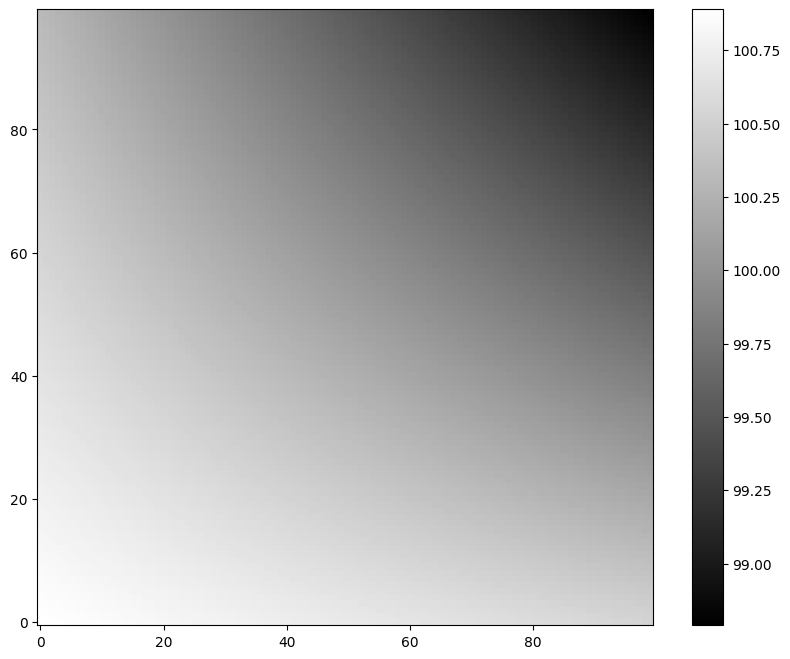

In [42]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

In [43]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()


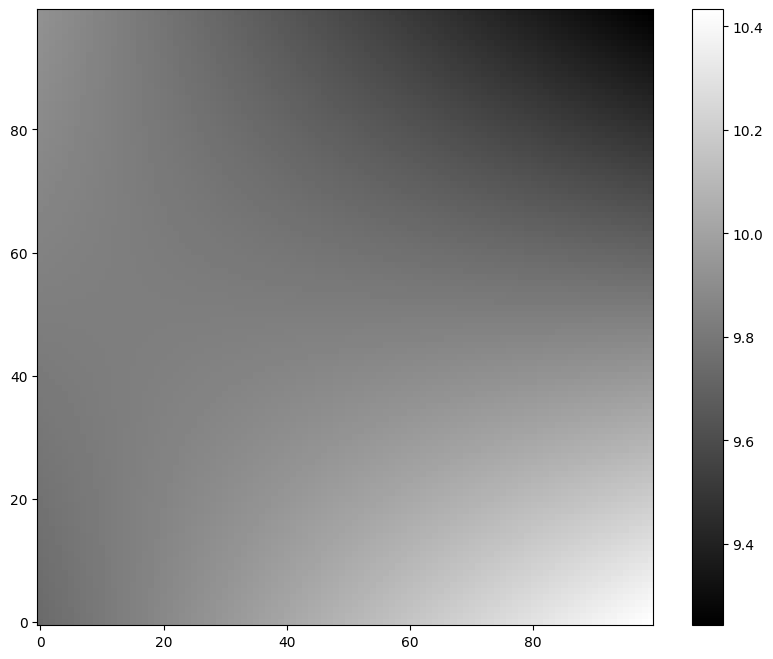

In [44]:
# Save the background noise plot
plt.figure()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('background_noise.png')

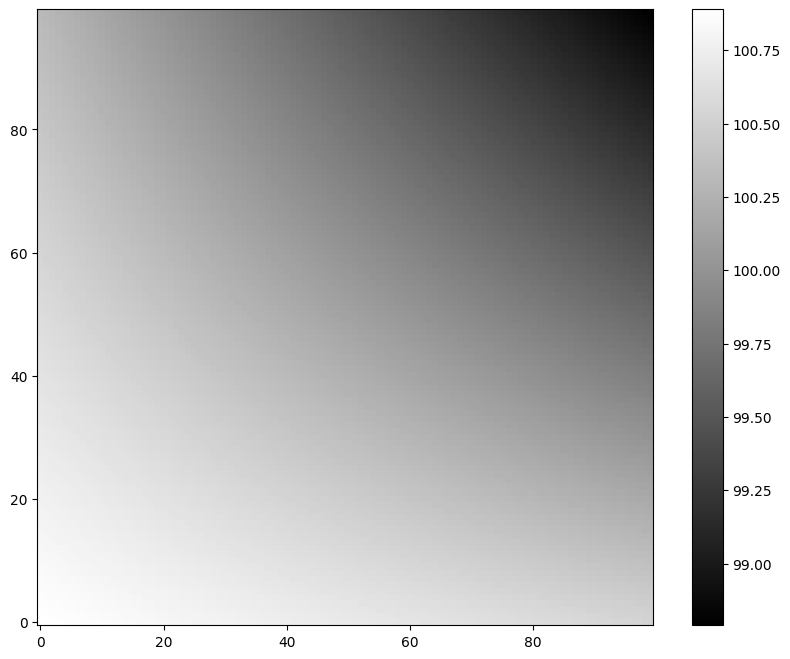

In [45]:
# subtract the background
data_sub = data - bkg

# Save the background plot
plt.figure()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('background.png')

In [46]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)


In [47]:
# how many objects were detected
len(objects)

0

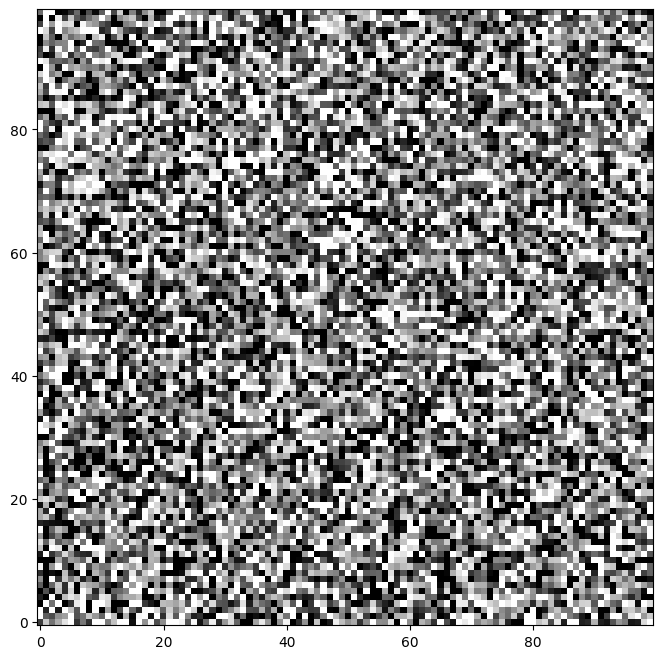

In [48]:
from matplotlib.patches import Ellipse

# Save the background-subtracted image with ellipses
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('background_subtracted_with_ellipses.png')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [49]:
# available fields
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [50]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

In [52]:
# Assuming you have already performed object detection using sep.extract
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Check if any objects were detected
if len(objects) == 0:
    print("No objects detected.")
else:
    # Get the flux, fluxerr, and flag values for the detected objects
    flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

    # Show information for the first 10 detected objects: 
    num_objects_to_display = min(10, len(objects))
    for i in range(num_objects_to_display):
        print("Object {:d}: Flux = {:.4f} +/- {:.4f}".format(i, flux[i], fluxerr[i]))


No objects detected.


In [ ]:

# Save the background-subtracted image with ellipses
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig('background_subtracted_with_ellipses.png')